In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("D://photo portel/trains.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data=train.copy()

In [4]:
data.columns=data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
(data.isnull().sum()/len(data))*100

item_identifier               0.000000
item_weight                  17.165317
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.276428
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales             0.000000
dtype: float64

# Imputation Of Missing Values in the Columns

In [7]:
group_mean_weight=data.pivot_table(index=['item_type'],values='item_weight',aggfunc=[np.mean])
group_mean_weight

,mean
,item_weight
item_type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328


In [8]:
mean_weight=group_mean_weight.iloc[:,[0][0]]
mean_weight

item_type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: (mean, item_weight), dtype: float64

In [9]:
def missing_value(cols):
    item_type=cols[0]
    item_weight=cols[1]
    if pd.isnull(item_weight):
        if item_type=="Baking Goods":
            return "12.272418"
        elif item_type=="Breads":
            return "10.866799"
        elif item_type=="Breakfast":
            return "13.759603"
        elif item_type=="Canned":
            return "12.393565"
        elif item_type=="Dairy":
            return "12.955040"
        elif item_type=="Frozen Foods":
            return "12.101543"
        elif item_type=="Fruits and Vegetables":
            return "13.146659"
        elif item_type=="Hard Drinks":
            return "11.844417"
        elif item_type=="Health and Hygiene":
            return "13.216929"
        elif item_type=="Household":
            return "13.270504"
        elif item_type=="Meat":
            return "12.702148"
        elif item_type=="Others":
            return "14.009725"
        elif item_type=="Seafood":
            return "13.241136"
        elif item_type=="Snack Foods":
            return "12.684256"
        elif item_type=="Soft Drinks":
            return "11.691965"
        elif item_type=="Starchy Foods":
            return "13.618247"
    return item_weight

In [10]:
data['item_weight']=data[['item_type','item_weight']].apply(missing_value,axis=1)

In [11]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# DATA UNDERSTANDING THROUGH VISUALIZATION

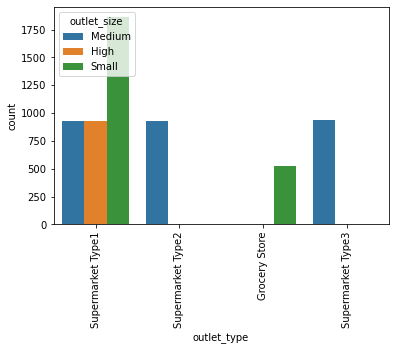

In [12]:
sns.countplot(data=data,x="outlet_type",hue="outlet_size")
plt.xticks(rotation=90);

In [13]:
data.outlet_size.value_counts()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

In [14]:
def impute_size(cols):
    size=cols[0]
    out_type=cols[1]
    if pd.isnull(size):
        if out_type=="Supermarket Type1":
            return "small"
        elif out_type=="Supermarket Type2":
            return "mediam"
        elif out_type=="Grocery Store":
            return "small"
        elif out_type=="Supermarket Type3":
            return "mediam"
    return size

In [15]:
data['outlet_size']=data[['outlet_size','outlet_type']].apply(impute_size,axis=1)


In [16]:
data['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
data['item_fat_content']=data['item_fat_content'].str.replace("LF","low fat").str.replace("reg","regular").str.lower()

In [18]:
data['item_fat_content'].unique()

array(['low fat', 'regular'], dtype=object)

In [19]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
mean_visibility = data.pivot_table(index = "item_identifier",  values = "item_visibility")

In [21]:

data.loc[(data["item_visibility"] == 0.0), "item_visibility"] = data.loc[(data["item_visibility"] == 0.0), "item_identifier"].apply(lambda x : mean_visibility.at[x, "item_visibility"])

<AxesSubplot:xlabel='outlet_identifier', ylabel='item_outlet_sales'>

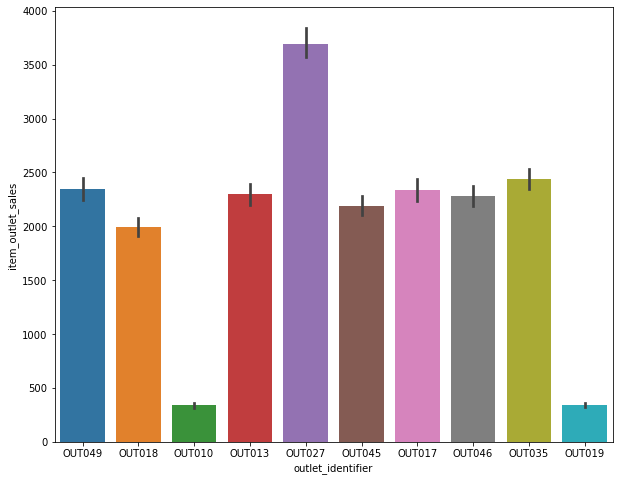

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=data,x="outlet_identifier",y="item_outlet_sales")

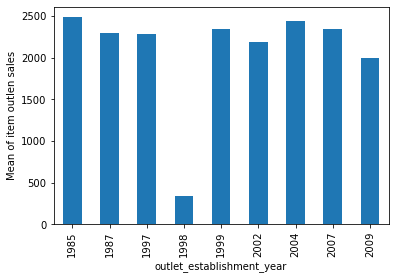

In [23]:
data.groupby(['outlet_establishment_year'])['item_outlet_sales'].mean().plot.bar()
plt.ylabel("Mean of item outlen sales");

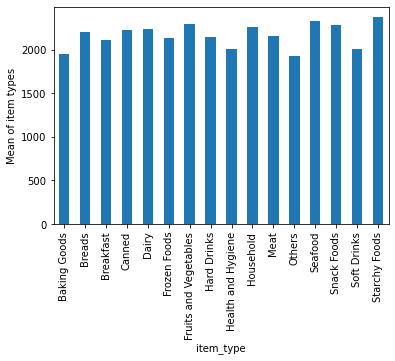

In [24]:
data.groupby(['item_type'])['item_outlet_sales'].mean().plot.bar()
plt.ylabel("Mean of item types");

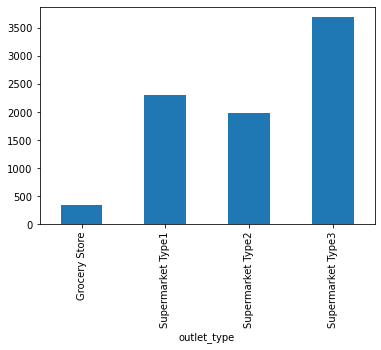

In [25]:
data.groupby(['outlet_type'])['item_outlet_sales'].mean().plot.bar();

In [26]:
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.3,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count

In [27]:
cols = ['item_identifier', 'item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type']

In [28]:

for i in cols:
    x=data[i].value_counts().to_dict()
    data[i]=data[i].map(x)

In [29]:
data.head(10)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,8,9.3,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.5,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.2,3006,0.015274,1232,182.0950,555,555,2410,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052
5,3,10.395,3006,0.060928,648,51.4008,928,928,2793,3350,928,556.6088
6,8,13.65,3006,0.012741,1200,57.6588,932,932,932,3350,5577,343.5528
7,7,12.684256,5517,0.127470,1200,107.7622,935,1463,2793,3350,935,4022.7636
8,7,16.2,3006,0.016687,856,96.9726,929,929,2410,2785,5577,1076.5986
9,5,19.2,3006,0.094450,856,187.8214,926,926,2410,2785,5577,4710.5350


In [30]:
new_data=data.copy()

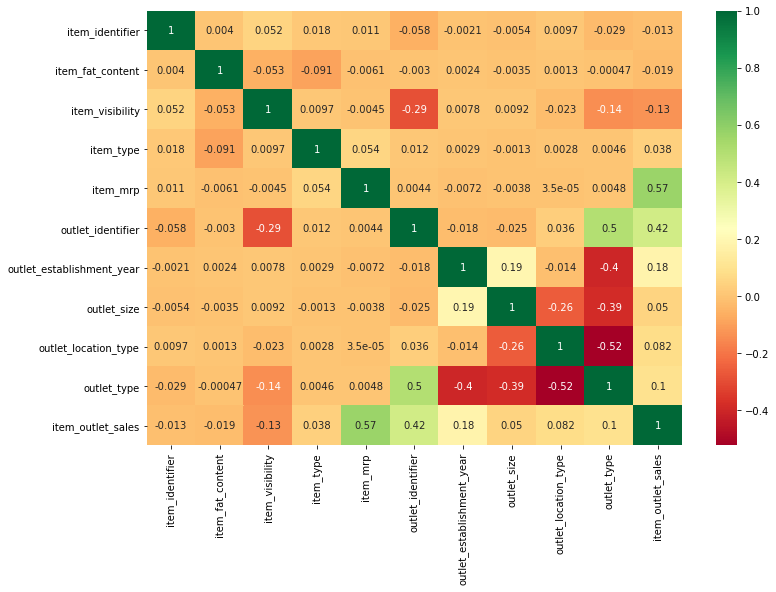

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),cmap = "RdYlGn", annot = True);

In [32]:
new_data=new_data.drop(["item_weight","item_identifier", "item_type", "item_fat_content","outlet_location_type"], axis = 1)

In [33]:
new_data.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,2410,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [34]:
new_data.skew()

item_visibility              1.233294
item_mrp                     0.127202
outlet_identifier           -2.244651
outlet_establishment_year    0.936439
outlet_size                 -1.958502
outlet_type                 -0.650418
item_outlet_sales            1.177531
dtype: float64

VISUALIZING THE SKEWNESSS OF THE DATASET

C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

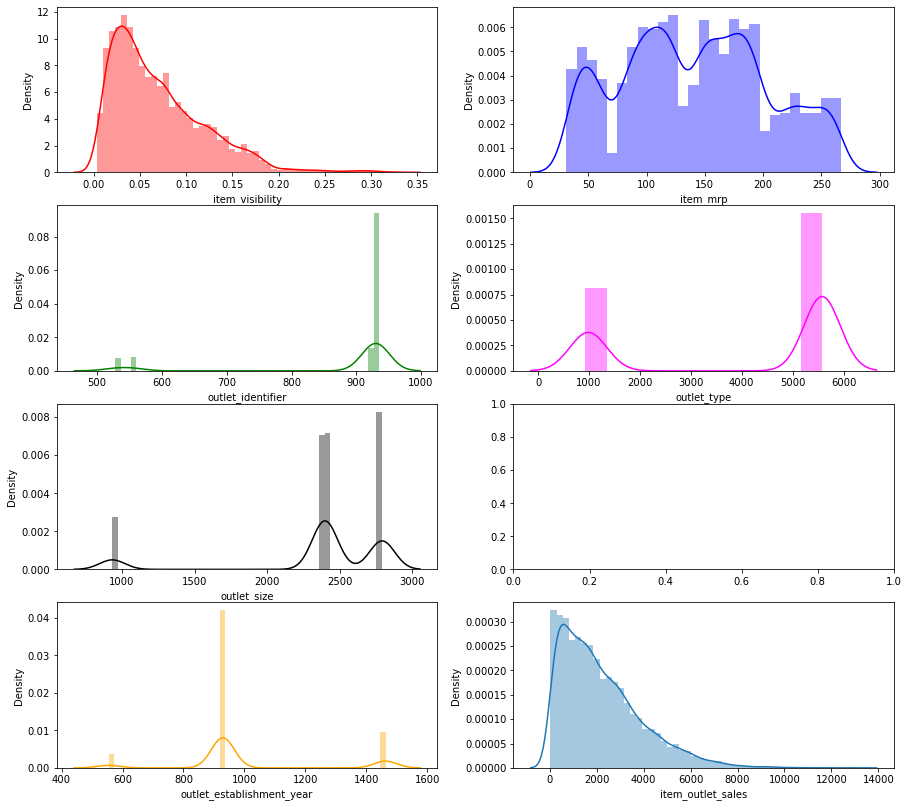

In [35]:
fig,ax=plt.subplots(4,2,figsize=(15,14))
sns.distplot(new_data['item_visibility'],kde=True,ax=ax[0,0],color='red')
sns.distplot(new_data['item_mrp'],kde=True,ax=ax[0,1],color='blue')
sns.distplot(new_data['outlet_identifier'],kde=True,ax=ax[1,0],color='green')
sns.distplot(new_data['outlet_type'],kde=True,ax=ax[1,1],color='magenta')
sns.distplot(new_data['outlet_size'],kde=True,ax=ax[2,0],color='black')
sns.distplot(new_data['outlet_establishment_year'],kde=True,ax=ax[3,0],color='orange')
sns.distplot(new_data['item_outlet_sales'],kde=True,ax=ax[3,1]);


# From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness

In [36]:
for i in new_data.columns:
    new_data[i]=np.log(new_data[i])

In [37]:
new_data.head(20)

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type,item_outlet_sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,7.787382,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446
5,-2.798059,3.939654,6.833032,6.833032,7.934872,6.833032,6.321863
6,-4.362923,4.054543,6.837333,6.837333,6.837333,8.626406,5.839341
7,-2.059875,4.679927,6.840547,7.288244,7.934872,6.840547,8.299724
8,-4.093118,4.574428,6.834109,6.834109,7.787382,8.626406,6.981562
9,-2.359689,5.235492,6.830874,6.830874,7.787382,8.626406,8.457557


C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

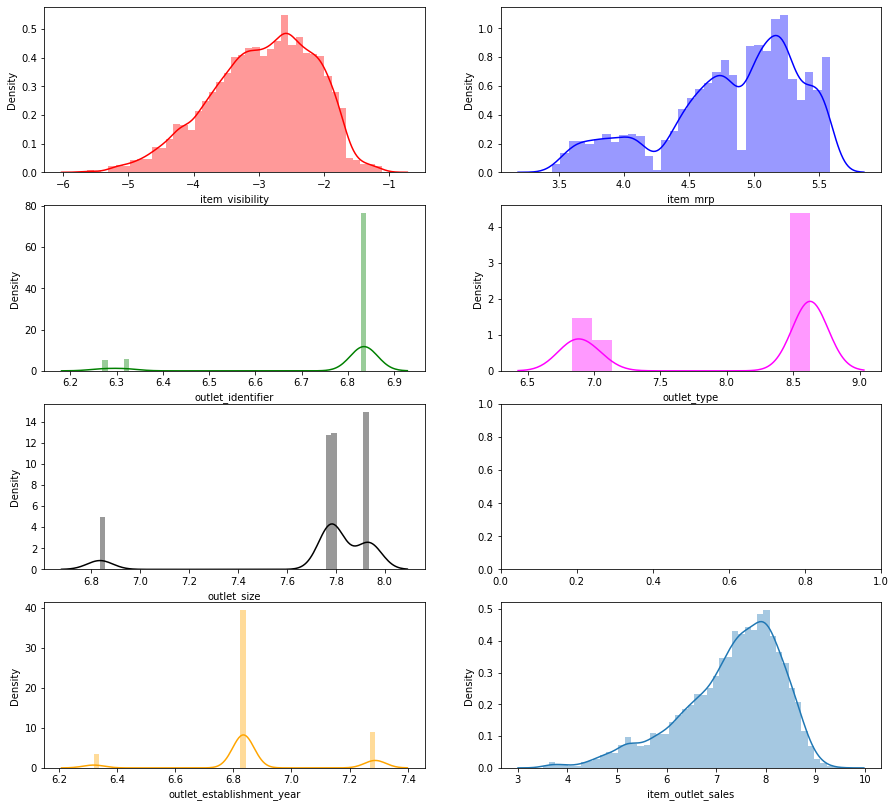

In [38]:
fig,ax=plt.subplots(4,2,figsize=(15,14))
sns.distplot(new_data['item_visibility'],kde=True,ax=ax[0,0],color='red')
sns.distplot(new_data['item_mrp'],kde=True,ax=ax[0,1],color='blue')
sns.distplot(new_data['outlet_identifier'],kde=True,ax=ax[1,0],color='green')
sns.distplot(new_data['outlet_type'],kde=True,ax=ax[1,1],color='magenta')
sns.distplot(new_data['outlet_size'],kde=True,ax=ax[2,0],color='black')
sns.distplot(new_data['outlet_establishment_year'],kde=True,ax=ax[3,0],color='orange')
sns.distplot(new_data['item_outlet_sales'],kde=True,ax=ax[3,1]);

In [39]:
new_data.skew()

item_visibility             -0.429840
item_mrp                    -0.735795
outlet_identifier           -2.249965
outlet_establishment_year    0.026025
outlet_size                 -2.276189
outlet_type                 -0.657515
item_outlet_sales           -0.887753
dtype: float64

# Linear Regression Model

In [40]:
new_data['item_outlet_sales'].value_counts()

6.865632    17
7.202105    16
6.555478    15
7.520558    15
7.153315    14
            ..
6.959679     1
8.978620     1
8.477290     1
7.871154     1
5.210005     1
Name: item_outlet_sales, Length: 3493, dtype: int64

In [41]:
x=new_data.drop(['item_outlet_sales'],axis=1)
y=new_data['item_outlet_sales']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
#prediction
y_pred=model.predict(x_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.7569417621933564

In [46]:
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

0.5198711350070588

# R2_Score = 75.70%
# RMSE =0.519

In [47]:
#Residue of the Linear Regression Model 
residue_li=y_test -y_pred

Text(0, 0.5, 'Y_test')

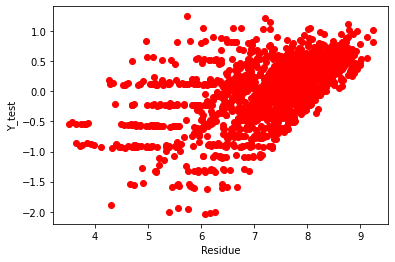

In [48]:
plt.scatter(y_test,residue_li,c='red')
plt.xlabel("Residue")
plt.ylabel("Y_test")


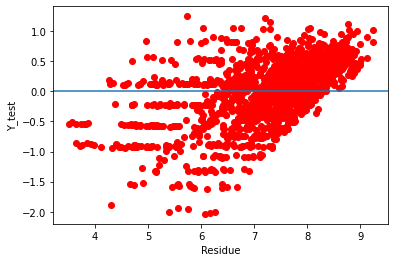

In [49]:
plt.scatter(y_test,residue_li,c='red')
plt.xlabel("Residue")
plt.ylabel("Y_test")
plt.axhline(y=0)

# Regularization

Lasso

In [50]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.009)
ls.fit(x_train,y_train)




Lasso(alpha=0.009)

In [51]:
y_pred=ls.predict(x_test)

In [52]:
#Accuracy After Lasso
r2_score(y_test,y_pred)

0.7468491769184082

In [53]:
#Root mean squre error
sqrt(mean_squared_error(y_test,y_pred))

0.5305547462917749

# After Lassso Regression
## R2_Score=74.70%
## RMSE =.530

<AxesSubplot:>

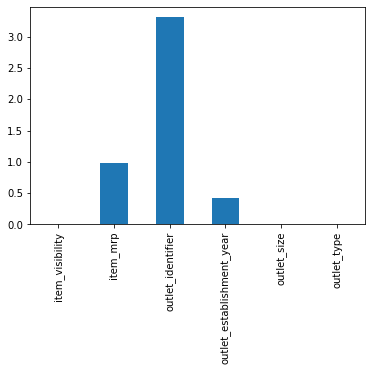

In [54]:
# getting lasso coefficent
lasso_coef=pd.Series(ls.coef_,index=x.columns)
lasso_coef.plot(kind='bar')

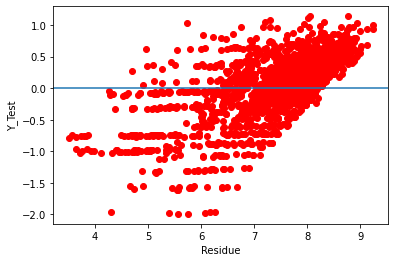

In [55]:
#Residue of the Linear Regression Model 
residue_lasso = y_test -y_pred
plt.scatter(y_test,residue_lasso,c='red')
plt.xlabel("Residue")
plt.ylabel("Y_Test")
plt.axhline(y=0)

# RIDGE Regression

In [56]:
rid=Ridge(alpha=0.009)
rid.fit(x_train,y_train)

Ridge(alpha=0.009)

In [57]:
y_pred=rid.predict(x_test)
r2_score(y_test,y_pred)

0.7569395900719764

In [58]:
sqrt(mean_squared_error(y_test,y_pred))

0.5198734579496888

# After Ridge Regression
## R2_Score =75.70%
## RMSE =.519

In [59]:
#residue after ridge
reside =y_test -y_pred


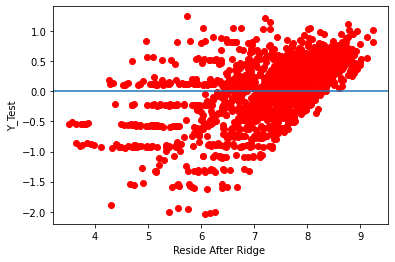

In [60]:
plt.scatter(y_test,reside,c='red')
plt.xlabel("Reside After Ridge ")
plt.ylabel("Y_Test")
plt.axhline(y=0)

### Lasso Regression show low accuracy in trem of liner Regression
### Ridge Regression show similar accracy in trem of liner Gegression
## accepting the liner Regression Model to Predict the best data item outlet sale

# TEST DATA

In [61]:
test=pd.read_csv("D://photo portel/test.csv")

In [62]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [63]:
df =test.copy()

In [64]:
df.columns =df.columns.str.lower()

In [65]:
(df.isnull().sum()/len(df))*100

item_identifier               0.000000
item_weight                  17.180074
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.269671
outlet_location_type          0.000000
outlet_type                   0.000000
dtype: float64

In [66]:
group_mean=df.pivot_table(index=['item_type'],values=['item_weight'],aggfunc=[np.mean])

In [67]:
mean_weight=group_mean.iloc[:,[0][0]]

In [68]:
mean_weight

item_type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247
Name: (mean, item_weight), dtype: float64

In [69]:
def missing_value(cols):
    item_type=cols[0]
    item_weight=cols[1]
    if pd.isnull(item_weight):
        if item_type=="Baking Goods":
            return "12.272418"
        elif item_type=="Breads":
            return "10.866799"
        elif item_type=="Breakfast":
            return "13.759603"
        elif item_type=="Canned":
            return "12.393565"
        elif item_type=="Dairy":
            return "12.955040"
        elif item_type=="Frozen Foods":
            return "12.101543"
        elif item_type=="Fruits and Vegetables":
            return "13.146659"
        elif item_type=="Hard Drinks":
            return "11.844417"
        elif item_type=="Health and Hygiene":
            return "13.216929"
        elif item_type=="Household":
            return "13.270504"
        elif item_type=="Meat":
            return "12.702148"
        elif item_type=="Others":
            return "14.009725"
        elif item_type=="Seafood":
            return "13.241136"
        elif item_type=="Snack Foods":
            return "12.684256"
        elif item_type=="Soft Drinks":
            return "11.691965"
        elif item_type=="Starchy Foods":
            return "13.618247"
    return item_weight

In [70]:
df['item_weight']=df[['item_type','item_weight']].apply(missing_value,axis=1)

In [71]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.3,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.6,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.955040,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


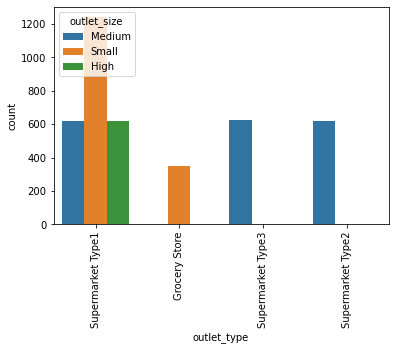

In [72]:
sns.countplot(data =df, x = "outlet_type",hue = "outlet_size")
plt.xticks(rotation =90);

In [73]:
def impute_size(cols):
    size=cols[0]
    out_type=cols[1]
    if pd.isnull(size):
        if out_type=="Supermarket Type1":
            return "small"
        elif out_type=="Supermarket Type2":
            return "mediam"
        elif out_type=="Grocery Store":
            return "small"
        elif out_type=="Supermarket Type3":
            return "mediam"
    return size

In [74]:
df["outlet_size"] = df[["outlet_size","outlet_type"]].apply(impute_size, axis = 1)

In [75]:
df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.3,reg,0.038428,Dairy,87.3198,OUT017,2007,small,Tier 2,Supermarket Type1
2,NCN55,14.6,Low Fat,0.099575,Others,241.7538,OUT010,1998,small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,small,Tier 2,Supermarket Type1
4,FDY38,12.955040,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [76]:
df['item_fat_content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [77]:
df['item_fat_content']=df['item_fat_content'].str.replace('LF','low fat').str.replace('reg','regular').str.lower()

In [78]:
df['item_fat_content'].unique()

array(['low fat', 'regular'], dtype=object)

In [79]:
mean_item_visibility=df.pivot_table(index=['item_identifier'],values=['item_visibility'])
mean_item_visibility.head()

,item_visibility
item_identifier,
DRA12,0.040901
DRA24,0.040009
DRA59,0.128046
DRB01,0.078302
DRB13,0.005294


In [80]:
new_test=df.copy()

In [81]:
new_test.dtypes

item_identifier               object
item_weight                   object
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
dtype: object

###IMPUTING CATEGORICAL VALUES WITH FREQUENCY OF RESPECTIVE COLUMNS IN THE TEST DATA

In [82]:
cols=['item_identifier','item_fat_content','item_type','outlet_identifier','outlet_establishment_year','outlet_size','outlet_location_type','outlet_type']

In [83]:
for i in cols:
    x=new_test[i].value_counts().to_dict()
    new_test[i]=new_test[i].map(x)

In [84]:
new_test.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,7,20.75,3668,0.007565,789,107.8622,620,620,1862,1592,3717
1,6,8.3,2013,0.038428,454,87.3198,617,617,1606,1856,3717
2,4,14.6,3668,0.099575,111,241.7538,370,370,1606,2233,722
3,3,7.315,3668,0.015388,789,155.0340,617,617,1606,1856,3717
4,4,12.955040,2013,0.118599,454,234.2300,624,976,1862,2233,624


In [85]:
new_test=new_test.drop(['item_identifier','item_weight','item_type','item_fat_content','outlet_location_type'],axis=1)

In [86]:
new_test.head()

,item_visibility,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_type
0,0.007565,107.8622,620,620,1862,3717
1,0.038428,87.3198,617,617,1606,3717
2,0.099575,241.7538,370,370,1606,722
3,0.015388,155.0340,617,617,1606,3717
4,0.118599,234.2300,624,976,1862,624


In [87]:
new_test.skew()

item_visibility              1.238312
item_mrp                     0.136182
outlet_identifier           -2.243972
outlet_establishment_year    0.940664
outlet_size                 -1.958016
outlet_type                 -0.650194
dtype: float64

C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='outlet_establishment_year', ylabel='Density'>

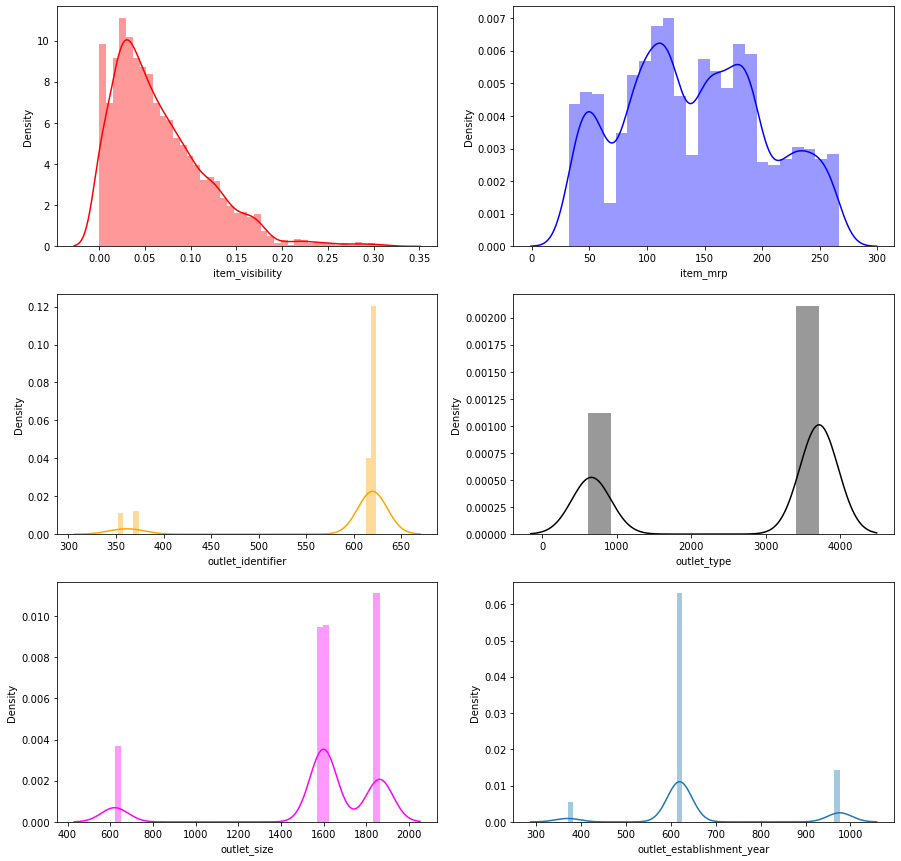

In [88]:
fig, ax = plt.subplots(3,2,figsize = (15,15))
sns.distplot(new_test["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_test["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_test["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_test["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_test["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_test["outlet_establishment_year"], kde =True, ax=ax[2,1])

In [89]:
#Applying the log transformation
for i in new_test.columns:
    new_test[i]=np.log(new_test[i]+1)

In [90]:
new_test.skew()

item_visibility              1.075093
item_mrp                    -0.714215
outlet_identifier           -2.249508
outlet_establishment_year    0.035052
outlet_size                 -2.276349
outlet_type                 -0.657290
dtype: float64

C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rajnish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='outlet_establishment_year', ylabel='Density'>

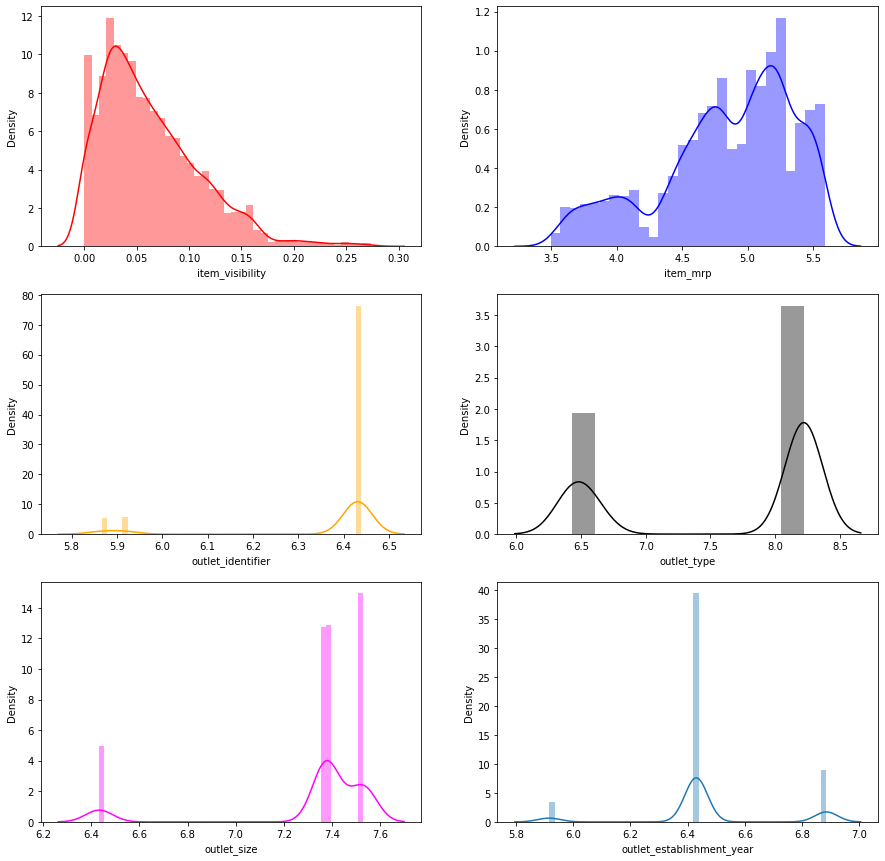

In [91]:
fig, ax = plt.subplots(3,2,figsize = (15,15))
sns.distplot(new_test["item_visibility"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_test["item_mrp"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_test["outlet_identifier"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_test["outlet_type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_test["outlet_size"], kde =True, ax=ax[2,0], color = "magenta")

sns.distplot(new_test["outlet_establishment_year"], kde =True, ax=ax[2,1])

In [92]:
y_pred=model.predict(new_test)

Above predicted values are transformed values. Therefore, we need to inverse transform it to get actual predicted values

In [96]:
actual_outscale_pred=np.exp(y_pred+1)

In [97]:
test["item_outlet_sale"] =actual_outscale_pred

In [98]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_outlet_sale
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,811.909707
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,638.240732
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,218.186016
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,1135.992345
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,2384.076108
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1055.342590
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,1292.953956
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,880.697702
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,1576.448127
